#### Introduction
This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. to predict acute aquatic toxicity towards Daphnia Magna. LC50 data, which is the concentration that causes death in 50% of test D. magna over a test duration of 48 hours, was used as model response. 

The model comprised 8 molecular descriptors: TPSA(Tot) (Molecular properties), SAacc (Molecular properties), H-050 (Atom-centred fragments), MLOGP (Molecular properties), RDCHI (Connectivity indices), GATS1p (2D autocorrelations), nN (Constitutional indices), C-040 (Atom-centred fragments). And one quantitative experimental response which is quantitiative response. The data can be downloaded from [here.](https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv)

Why:: Comparsion study between traditional machine learning and tensorflow.


#### Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### Load data

In [4]:
data = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";")
data

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.740
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064
...,...,...,...,...,...,...,...,...,...
540,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
541,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
542,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
543,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [5]:
# Need to have header
data = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";", names=['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
                          'quantitative response'])
data                         

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


#### Data information and characteristics

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TPSA                   546 non-null    float64
 1   SAacc                  546 non-null    float64
 2   H-050                  546 non-null    int64  
 3   MLOGP                  546 non-null    float64
 4   RDCHI                  546 non-null    float64
 5   GATS1p                 546 non-null    float64
 6   nN                     546 non-null    int64  
 7   C-040                  546 non-null    int64  
 8   quantitative response  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


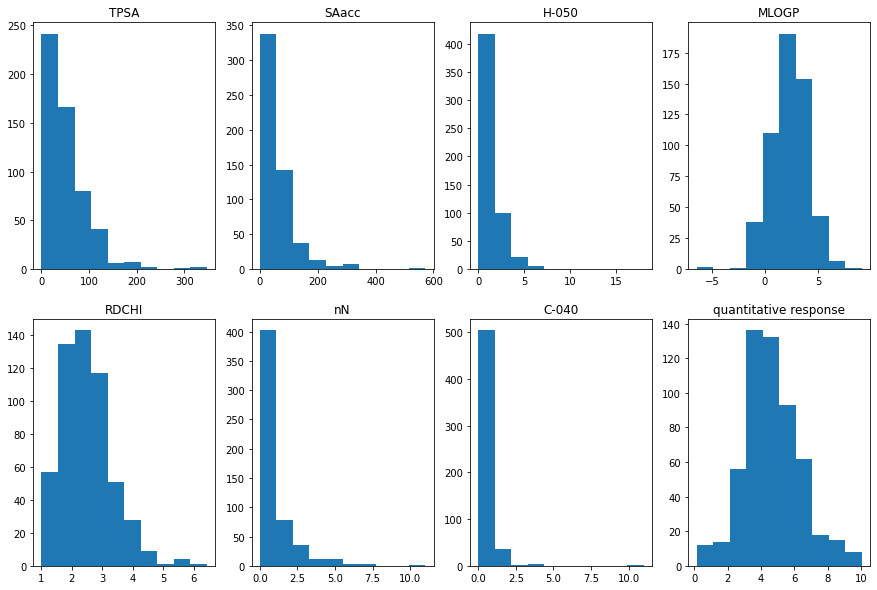

In [7]:
#Histogram Visualization
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs[0,0].hist(data['TPSA'])
axs[0,0].set_title('TPSA')

axs[0,1].hist(data['SAacc'])
axs[0,1].set_title('SAacc')

axs[0,2].hist(data['H-050'])
axs[0,2].set_title('H-050')

axs[0,3].hist(data['MLOGP'])
axs[0,3].set_title('MLOGP')

axs[1,0].hist(data['RDCHI'])
axs[1,0].set_title('RDCHI')

axs[1,1].hist(data['nN'])
axs[1,1].set_title('nN')

axs[1,2].hist(data['C-040'])
axs[1,2].set_title('C-040')

axs[1,3].hist(data['quantitative response'])
axs[1,3].set_title('quantitative response')

plt.show()

In [8]:
#### Define a function to get the columns that do not have any missing values

def get_cols_with_no_nans(df,col_type):
    """
    Arguments :
    df : The dataframe to process
    col_type:
        num : to only get numerical columns with no nans
        no_num : to only get non-numerical columns with no nans
        all : to get any columns with no nans
     """ 
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude = ['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include = ['object'])
    elif (col_type == 'all'):
        predictors = df
    else:
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [9]:
# Get the columns that do not have any missing values

num_cols = get_cols_with_no_nans(data, 'num')
cat_cols = get_cols_with_no_nans(data, 'no_num')

In [10]:
# How many column we got?

print("Number of numerical columns with no nan values : ", len(num_cols))
print("Number of non-numberical columns with no nan values :", len(cat_cols))

Number of numerical columns with no nan values :  9
Number of non-numberical columns with no nan values : 0


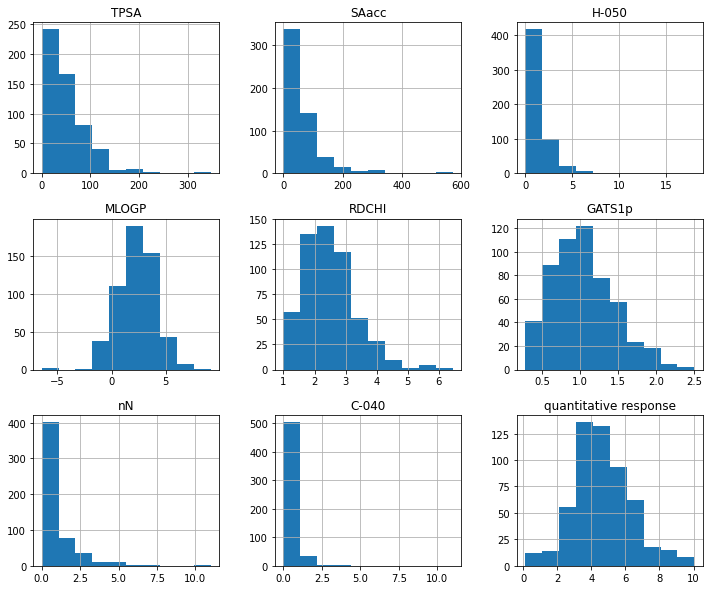

In [11]:
data = data[num_cols + cat_cols]
data.hist(figsize = (12,10))
plt.show()

In [12]:
# Split data : 70% of data for training and 30 % of data for data testing

x_train, x_test , y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitative response'),
                                    data['quantitative response'], test_size=0.3)

print("Train: ",len(x_train))
print("Test :", len(x_test))

Train:  382
Test : 164


#### Train and test the models

In [13]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mean Squared Error Linear Regression :", mean_squared_error(y_test, hasil_lnr))
print("Mean Squared Error Multilayer Perceptron :",mean_squared_error(y_test, hasil_mlp))

Mean Squared Error Linear Regression : 1.2878812587708344
Mean Squared Error Multilayer Perceptron : 1.3347136857412643


c:\Users\user\anaconda3\envs\atrophine_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


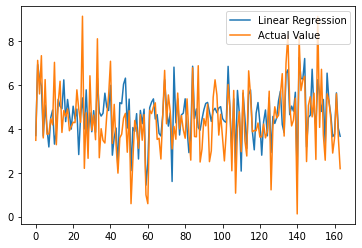

In [14]:
plt.plot(list(hasil_lnr), label ='Linear Regression')
plt.plot(list(y_test), label = 'Actual Value')

plt.legend(loc='upper right')

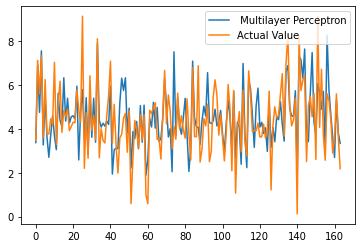

In [15]:
plt.plot(list(hasil_mlp), label = " Multilayer Perceptron")
plt.plot(list(y_test), label = 'Actual Value')
plt.legend(loc='upper right')

### Tensorflow

In [16]:
# Import library
from tensorflow.keras import Sequential, layers, optimizers

#### Model
Consists of : 8 nodes in the input layer 8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [17]:
def Simple_NN():
    model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape =[8]),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1)
    ])

    optimizer = optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer= optimizer, metrics = ['mae','mse'])
    return model
    

In [18]:
model = Simple_NN()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


#### Training Model

In [19]:
model.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 240.8678 - mae: 11.7334 - mse: 240.8678 - val_loss: 124.3585 - val_mae: 9.1347 - val_mse: 124.3585
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 85.4329 - mae: 7.5647 - mse: 85.4329 - val_loss: 55.4638 - val_mae: 6.3358 - val_mse: 55.4638
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 41.0686 - mae: 5.4205 - mse: 41.0686 - val_loss: 38.8329 - val_mae: 5.2221 - val_mse: 38.8329
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 31.7766 - mae: 4.6831 - mse: 31.7766 - val_loss: 32.9925 - val_mae: 4.6034 - val_mse: 32.9925
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 29.3634 - mae: 4.4616 - mse: 29.3634 - val_loss: 29.5982 - val_mae: 4.1825 - val_mse: 29.5982
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 27.3887 - mae: 4.2536 - mse: 27.3887 - val_loss: 26.4917 - val_mae: 4.0754 - val_mse: 

#### Testing model to predict the x_test

In [20]:
hasil_tf = model.predict(x_test)

hasil_tf.ravel()

6/6 [==============================] - 0s 798us/step


array([3.5271091, 7.774001 , 6.002693 , 7.816951 , 3.712844 , 6.3981905,
       4.183817 , 3.5307684, 4.6319227, 5.797741 , 4.3783474, 3.0279307,
       6.1508965, 5.4181957, 4.895147 , 7.762915 , 5.0949917, 4.939577 ,
       4.088111 , 5.445216 , 4.6677713, 5.901511 , 6.029692 , 3.162713 ,
       4.43395  , 7.4617014, 4.6316895, 6.160221 , 2.739211 , 5.6718473,
       4.3072357, 5.3555994, 5.396042 , 7.8368225, 6.0851717, 4.8490915,
       4.888694 , 4.9890804, 5.1031137, 5.1060276, 6.8952703, 3.19245  ,
       4.9862595, 3.1706986, 3.733489 , 6.2209983, 6.720766 , 6.2894077,
       7.4166064, 3.9287124, 5.2307935, 2.737637 , 4.0150585, 3.7632833,
       5.050894 , 3.1146402, 5.3832264, 3.396802 , 5.18346  , 2.491706 ,
       3.1560411, 5.1449127, 4.7317023, 5.0488186, 4.297408 , 4.5089903,
       5.42513  , 5.210781 , 6.8760843, 6.44479  , 4.8550253, 5.041118 ,
       5.09865  , 5.48314  , 7.8402987, 4.068237 , 6.972807 , 3.7343535,
       5.747504 , 5.171774 , 5.0296526, 3.6886144, 

#### Evaluate the model using mean squared error

In [21]:
mean_squared_error(y_test, hasil_tf)

2.0105550696161534

#### Data result visulization with line chart


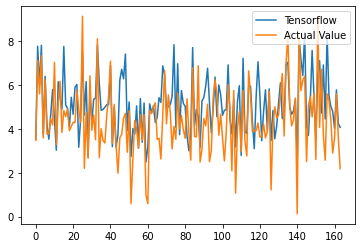

In [22]:
plt.plot(list(hasil_tf), label= "Tensorflow")
plt.plot(list(y_test), label = 'Actual Value')

plt.legend(loc='upper right')

#### Conclusion
The mse from tensorflow is higher than mse from linear regression. Thus, We can conclude that classical machine models are better than tensorflow for around 382 trainings. 